# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json 

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets of Bitcoin and Ethereum
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Execute .get request using requests library, extract response and convert and format data with json for Bitcoin
btc_data = requests.get(btc_url)
btc_content = btc_data.content
btc = btc_data.json()

print(json.dumps(btc, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19508193,
            "total_supply": 19508193,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 27942.0,
                    "volume_24h": 6642404449,
                    "market_cap": 545073354704,
                    "percentage_change_1h": 0.0112289167964898,
                    "percentage_change_24h": -0.205763663682334,
                    "percentage_change_7d": -0.447189496101005,
                    "percent_change_1h": 0.0112289167964898,
                    "percent_change_24h": -0.205763663682334,
                    "percent_change_7d": -0.447189496101005
                }
            },
            "last_updated": 1696825431
        }
    },
    "metadata": {
        "timestamp": 1696825431,
        "nu

In [6]:
# Fetch current BTC price
btc_current_price = btc["data"]["1"]["quotes"]["USD"]["price"]
btc_current_price

27942.0

In [7]:
# Execute .get request using requests library, extract response and convert and format data with json for Bitcoin
eth_data = requests.get(eth_url)
eth_content = eth_data.content
eth = eth_data.json()

print(json.dumps(eth, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120247521,
            "total_supply": 120247521,
            "max_supply": 120247521,
            "quotes": {
                "USD": {
                    "price": 1634.76,
                    "volume_24h": 5042867393,
                    "market_cap": 196600292310,
                    "percentage_change_1h": 0.110765655069058,
                    "percentage_change_24h": -0.0675872850240623,
                    "percentage_change_7d": -5.39019784145819,
                    "percent_change_1h": 0.110765655069058,
                    "percent_change_24h": -0.0675872850240623,
                    "percent_change_7d": -5.39019784145819
                }
            },
            "last_updated": 1696825437
        }
    },
    "metadata": {
        "timestamp": 1696825437,
  

In [8]:
# Fetch current ETH price
eth_current_price = eth["data"]["1027"]["quotes"]["USD"]["price"]
eth_current_price

1634.76

In [9]:
# Compute current value of my crpto
my_btc_value = (btc_current_price * my_btc)
my_eth_value = (eth_current_price * my_eth)
total_value_crypto = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The total value of my cryptocurrency portfolio is ${total_value_crypto:0.2f}")

The current value of your 1.2 BTC is $33530.40
The current value of your 5.3 ETH is $8664.23
The total value of my cryptocurrency portfolio is $42194.63


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [12]:
# Format current date as ISO format
today = pd.Timestamp("2023-10-06", tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today 
).df

df_portfolio.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-10-06 04:00:00+00:00,92.46,92.980,92.3708,92.75,9569518,29324,92.731221,AGG
2023-10-06 04:00:00+00:00,421.97,431.125,420.6000,429.54,113273309,737826,426.955955,SPY


In [13]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

In [14]:
# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio.head()

AGG                                              \
                            open   high      low  close   volume trade_count   
timestamp                                                                      
2023-10-06 04:00:00+00:00  92.46  92.98  92.3708  92.75  9569518       29324   

                                         SPY                          \
                                vwap    open     high    low   close   
timestamp                                                              
2023-10-06 04:00:00+00:00  92.731221  421.97  431.125  420.6  429.54   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2023-10-06 04:00:00+00:00  113273309      737826  426.955955

In [15]:
df_portfolio['AGG']['close'].dtype

dtype('float64')

In [16]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $92.75
Current SPY closing price: $429.54


C:\Users\JamesDavidson\AppData\Local\Temp\ipykernel_12056\4254263255.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  agg_close_price = float(df_portfolio["AGG"]["close"])
C:\Users\JamesDavidson\AppData\Local\Temp\ipykernel_12056\4254263255.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spy_close_price = float(df_portfolio["SPY"]["close"])


In [17]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
total_value_stock_and_bonds = my_agg_value + my_spy_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The total value of my stock and bond portfolio is ${total_value_stock_and_bonds:0.2f}")

The current value of your 50 SPY shares is $21477.00
The current value of your 200 AGG shares is $18550.00
The total value of my stock and bond portfolio is $40027.00


### Savings Health Analysis

In [18]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [total_value_crypto, total_value_stock_and_bonds]

# Create savings DataFrame
savings_df = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'stock/bond'])

# Display savings DataFrame
display(savings_df)

,amount
crypto,42194.628
stock/bond,40027.000


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

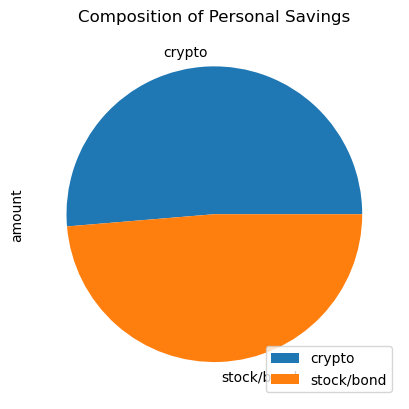

In [19]:
# Plot savings pie chart
savings_df.plot.pie(y='amount', title='Composition of Personal Savings')

In [20]:
# Set ideal emergency fund
emergency_fund_value = monthly_income * 3

# Calculate total amount of savings
total_portfolio_value = (total_value_crypto + total_value_stock_and_bonds)
total_portfolio_value

82221.628

In [21]:
# Validate saving health
if total_portfolio_value > emergency_fund_value:
    print("Congratulations! You have enough money in your portfolio to fund your emergency fund.")
elif total_portfolio_value == emergency_fund_value:
    print("Congratulations! You have reached an important financial goal of being able to afford funding your emergency fund.")
else:
    shortfall = (emergency_fund_value - total_portfolio_value)
    print(f"You are currently ${shortfall:.2f} away from reaching your emergency fund goal.")

Congratulations! You have enough money in your portfolio to fund your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-10-06', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-10-06', tz='America/New_York').isoformat()

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
retirement_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
retirement_agg = retirement_df[retirement_df['symbol']=='AGG'].drop('symbol', axis=1)
retirement_spy = retirement_df[retirement_df['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
retirement_df = pd.concat([retirement_agg, retirement_spy], axis=1, keys=["AGG", "SPY"])

# Display sample data
retirement_df.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-10-07 04:00:00+00:00  113.64  113.7050  113.510  113.51  2493664   
2019-10-08 04:00:00+00:00  113.82  113.8200  113.485  113.55  3055860   
2019-10-09 04:00:00+00:00  113.55  113.5600  113.359  113.49  3333988   
2019-10-10 04:00:00+00:00  113.27  113.3300  113.030  113.10  4312383   
2019-10-11 04:00:00+00:00  112.84  112.8501  112.585  112.73  3568711   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2019-10-07 04:00:00+00:00        9765  113.575284  293.47  295.26  292.7700   
2019-10-08 04:00:00+00:00       15705  113.614504  291.04  291.85  288.4900   
2019-10-09 04:00:00+00:00       11224  113.459773  290.75  292.30  288.6559   
2019-10-10 04:00:00+00:00       15063  113.115828  291.18  294.21  291.0000   
2019-10-11 04:00:00+00:00       16380  112.714593  296.27  298.74  296.1448   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2019-10-07 04:00:00+00:00  293.10   61657344      314251  293.863605  
2019-10-08 04:00:00+00:00  288.66  103233039      495649  290.224498  
2019-10-09 04:00:00+00:00  291.12   67331098      295521  291.047068  
2019-10-10 04:00:00+00:00  293.29   57265975      335440  292.960881  
2019-10-11 04:00:00+00:00  296.25  101330616      503760  297.177407

In [24]:
# Create a Financial Planner for Retirement using the Monte Carlo Simulation
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
mc_retirement = MCSimulation(
    portfolio_data = retirement_df,
    weights = [.40, .60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

# Printing the simulation input data
mc_retirement.portfolio_data.head()
import warnings
warnings.filterwarnings("ignore")

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989006,1.013613,1.021941,0.997682,0.998263,0.995317,0.980549,1.012646,0.994772,0.993974,...,1.005553,1.012750,1.003189,1.001076,1.017360,0.989807,0.982790,0.996425,1.002806,1.013867
2,0.992341,1.017441,1.020290,0.993357,0.987260,0.995700,0.974812,1.031561,0.992964,1.014432,...,1.004154,1.016279,1.004349,1.012458,1.020324,0.987074,0.974374,1.005950,0.998764,1.010670
3,0.999322,1.023841,1.014313,0.975726,0.994341,0.997191,0.974815,1.028849,0.973710,1.014314,...,0.998255,1.008773,0.987793,1.005993,1.003467,0.986763,0.977011,0.979736,1.000253,1.002872
4,0.992195,1.027105,0.995612,0.988544,0.990087,0.999151,0.977999,1.036179,0.982570,1.031555,...,0.986257,1.015238,1.002542,0.992865,0.990996,0.997668,0.980232,0.980676,1.007686,1.000978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.250344,5.000624,5.927314,2.985609,1.904761,12.515352,2.968944,9.382874,2.421592,9.933228,...,4.203298,2.400594,5.623946,7.030808,6.474642,1.387806,6.490689,2.707368,10.401997,2.143530
7557,3.261760,5.031532,5.969911,2.969261,1.880925,12.486574,2.918874,9.416260,2.389985,9.926400,...,4.186560,2.384281,5.593390,6.980727,6.492368,1.399350,6.481577,2.692731,10.228737,2.134499
7558,3.255537,5.002915,6.007015,2.945863,1.905030,12.630943,2.944586,9.393070,2.403184,9.689336,...,4.238077,2.364458,5.582986,7.118172,6.447745,1.400174,6.609625,2.693609,10.132020,2.134118
7559,3.254969,5.093192,6.072782,2.971432,1.914224,12.553677,2.892388,9.226875,2.367593,9.626065,...,4.292840,2.369529,5.563761,7.118301,6.417844,1.377745,6.618137,2.689896,10.129804,2.131382


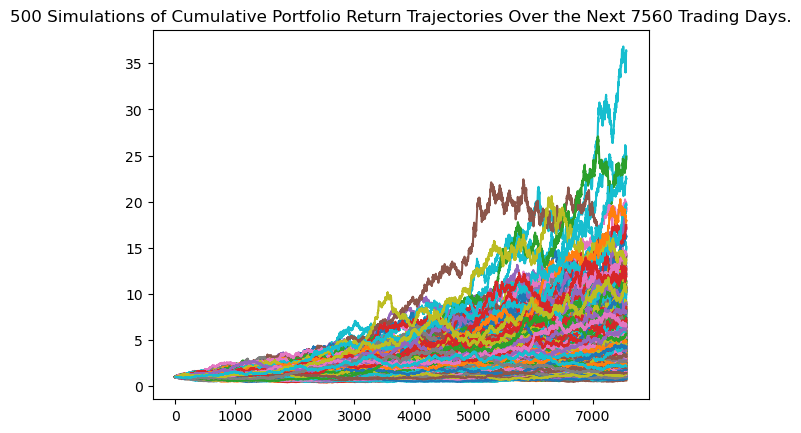

In [26]:
# Plot simulation outcomes using a line plot
line_plot = mc_retirement.plot_simulation()

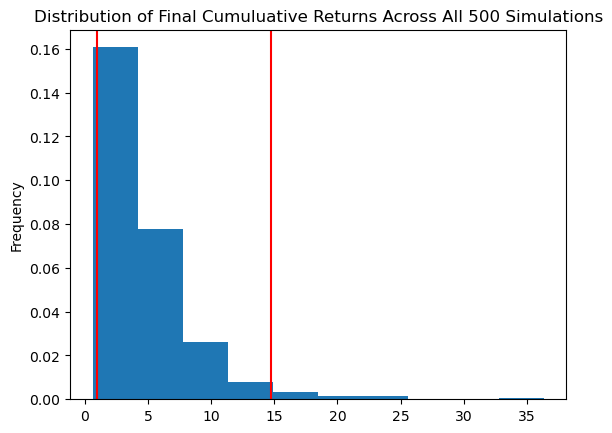

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = mc_retirement.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement_tbl = mc_retirement.summarize_cumulative_return()

# Print summary statistics
print(retirement_tbl)

25%               2.295833
50%               3.521997
75%               5.966802
95% CI Lower      0.951755
95% CI Upper     14.717676
count           500.000000
max              36.345238
mean              4.747752
min               0.621552
std               3.888057
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(retirement_tbl[3]*20000,2)
ci_upper = round(retirement_tbl[4]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19035.09 and $294353.52


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(retirement_tbl[3]*30000,2)
ci_upper = round(retirement_tbl[4]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $28552.64 and $441530.27


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns. Will adjust weights of investments to compensate for shorter investment horizon.
mc_5_retirement = MCSimulation(
    portfolio_data = retirement_df,
    weights = [.05, .95],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

# Printing the simulation input data
mc_5_retirement.portfolio_data.head()
import warnings
warnings.filterwarnings("ignore")

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5_retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009487,1.002454,1.009220,0.986636,1.005269,0.973886,1.008649,0.989694,1.000122,0.990211,...,1.018586,1.003769,0.998977,0.998085,0.999306,1.003668,1.016299,0.985434,0.990293,0.996498
2,1.004531,1.006158,1.016029,0.968690,1.012576,0.977479,0.989427,1.014136,0.991711,0.987159,...,1.000525,1.005283,0.995140,0.999949,0.993678,0.992957,0.998167,0.980303,0.986655,0.987499
3,1.039581,1.007310,1.005906,0.971935,1.021825,0.981843,0.997841,1.008046,0.986814,0.989258,...,0.978570,1.013228,0.995550,1.010462,1.015165,0.991428,1.003211,0.966541,0.989335,0.995296
4,1.035614,1.002534,1.016110,0.986665,1.030821,0.986057,1.023333,0.999454,0.996753,0.971845,...,0.975056,1.006786,0.969053,1.000436,1.036215,0.997319,1.001644,0.962456,1.005062,0.997623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.906315,3.564756,1.486311,0.993680,0.853808,1.713356,2.846123,1.066820,1.722619,0.531812,...,2.054166,1.258419,2.628340,0.826810,2.619594,2.136080,0.755445,2.350314,3.177554,0.980057
1257,2.909733,3.561745,1.483194,0.978448,0.855113,1.730629,2.771456,1.070846,1.664434,0.532694,...,2.085830,1.265715,2.678009,0.833843,2.618245,2.105695,0.770982,2.364399,3.161409,0.997447
1258,2.844992,3.597040,1.486811,0.982835,0.845933,1.754917,2.832436,1.048747,1.686996,0.533526,...,2.054632,1.258232,2.639443,0.867359,2.618886,2.048728,0.771112,2.437340,3.163326,0.996089
1259,2.865025,3.614634,1.451710,1.010603,0.852933,1.798812,2.805572,1.055913,1.642930,0.540029,...,2.040618,1.252735,2.626480,0.854624,2.585880,2.056721,0.776787,2.430025,3.121830,1.011619


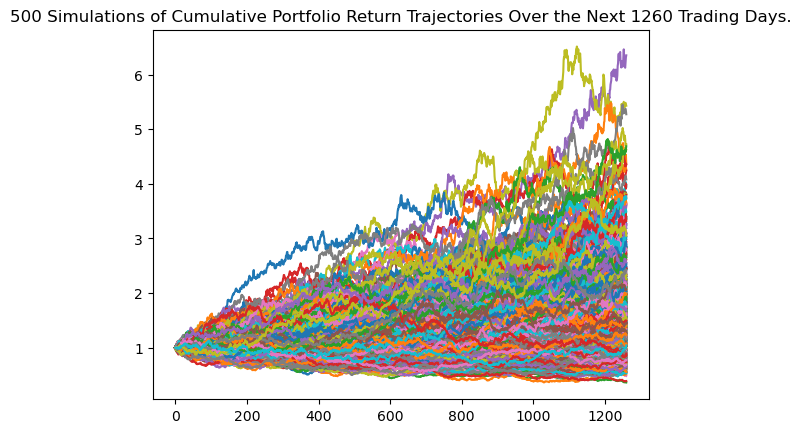

In [33]:
# Plot simulation outcomes
line_5_plot = mc_5_retirement.plot_simulation()

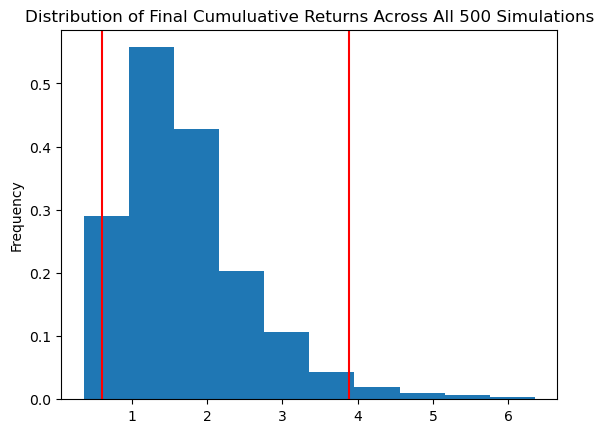

In [34]:
# Plot probability distribution and confidence intervals
dist_5_plot = mc_5_retirement.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results for the 5 year retirement horizon
retirement_5_tbl = mc_5_retirement.summarize_cumulative_return()

# Print summary statistics
print(retirement_5_tbl)

25%               1.110299
50%               1.543449
75%               2.123510
95% CI Lower      0.608150
95% CI Upper      3.886709
count           500.000000
max               6.355443
mean              1.714391
min               0.361635
std               0.864495
Name: 1260, dtype: float64


In [36]:
# Set initial investment
initial_5_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5 = round(retirement_5_tbl[3]*60000,2)
ci_upper_5 = round(retirement_5_tbl[4]*60000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_5_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $36488.98 and $233202.56


### Ten Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns. Will adjust weights of investments to compensate for shorter investment horizon
# Weights will more more conservative than 5 years but more risky than 30 years
mc_10_retirement = MCSimulation(
    portfolio_data = retirement_df,
    weights = [.20, .80],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

# Printing the simulation input data
mc_10_retirement.portfolio_data.head()
import warnings
warnings.filterwarnings("ignore")

In [38]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

mc_10_retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011960,1.021988,1.005461,1.000253,1.006376,0.985427,1.000585,1.000306,1.006403,0.994388,...,1.002215,1.001732,1.001524,1.012124,0.996157,0.991513,1.005789,1.005765,0.997648,0.996797
2,1.043876,1.027464,0.989804,1.006955,1.006190,0.976280,1.024478,0.993989,1.017066,1.007862,...,1.013342,0.987065,0.987684,1.015136,0.982988,1.003498,1.007272,0.994677,1.017157,1.001180
3,1.026987,1.020686,0.998339,1.015468,1.001938,0.973853,1.022595,0.994097,1.017492,0.999576,...,1.029397,0.989362,0.993088,1.012752,0.999012,0.994423,0.997419,0.986755,0.995813,0.992332
4,1.009316,1.031128,0.981471,1.034492,1.004363,0.967436,1.033748,1.000805,1.006421,1.026054,...,1.021918,0.978437,0.987670,1.007128,1.008922,0.996421,0.987877,0.999644,0.998581,1.005034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.024881,1.477538,1.327227,2.812856,3.035987,1.885813,1.444591,4.236025,1.159204,1.397595,...,1.250534,2.243200,6.569257,1.939363,1.302044,1.682599,1.266329,1.935136,3.535577,3.766223
2517,3.999391,1.498165,1.315501,2.835309,3.052579,1.912513,1.396883,4.265649,1.182130,1.406599,...,1.252286,2.233610,6.542695,1.969056,1.288992,1.674802,1.278426,1.948310,3.492010,3.696518
2518,4.038943,1.480858,1.321881,2.812081,3.061975,1.923253,1.413969,4.289322,1.178220,1.403324,...,1.275374,2.245606,6.450782,1.942750,1.312620,1.676534,1.267608,1.964097,3.497153,3.652169
2519,4.033782,1.470291,1.300444,2.796777,3.034667,1.922534,1.419582,4.230864,1.179881,1.404545,...,1.277588,2.254089,6.528207,1.958781,1.302728,1.679584,1.264093,1.946255,3.633632,3.603443


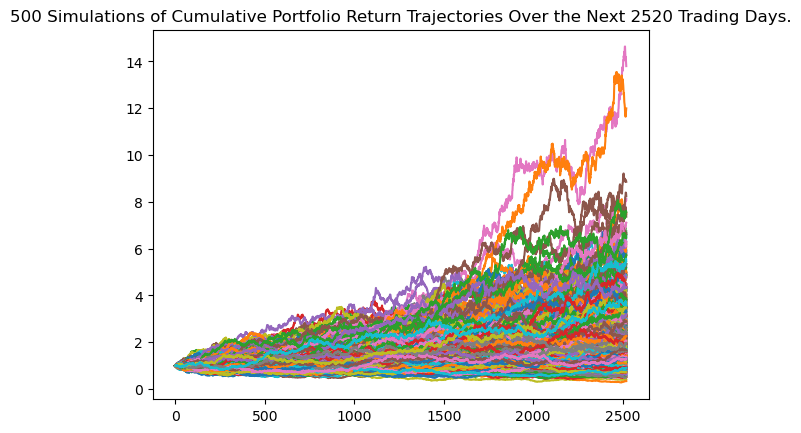

In [39]:
# Plot simulation outcomes
line_10_plot = mc_10_retirement.plot_simulation()

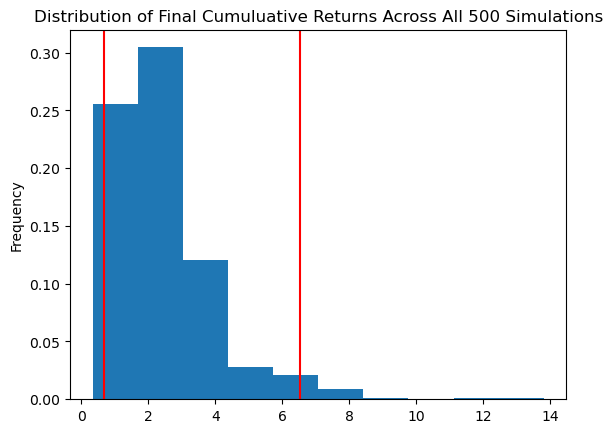

In [40]:
# Plot probability distribution and confidence intervals
dist_10_plot = mc_10_retirement.plot_distribution()

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement_10_tbl = mc_10_retirement.summarize_cumulative_return()

# Print summary statistics
print(retirement_10_tbl)

25%               1.428769
50%               2.127810
75%               2.990000
95% CI Lower      0.666053
95% CI Upper      6.530551
count           500.000000
max              13.801344
mean              2.454839
min               0.340476
std               1.553259
Name: 2520, dtype: float64


In [42]:
# Set initial investment
initial_10_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10 = round(retirement_10_tbl[3]*60000,2)
ci_upper_10 = round(retirement_10_tbl[4]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_10_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $39963.2 and $391833.09
